Titanic - Machine Learning from Disaster

https://www.kaggle.com/competitions/titanic linkinde bulunan yarışmayı gerçekleştirelim.

# Introduction

The sinking of Titanic is one of the most notorious shipwrecks in the history. In 1912, during her voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")  #matplotlib'in bir style'ı var ve bunun seaborn-whitegrid tarzını kullanmak istiyoruz.
import seaborn as sns
from collections import Counter

#Python'dan kaynaklı hataları kapatmak için:
import warnings
warnings.filterwarnings("ignore")

<function matplotlib.pyplot.show(close=None, block=None)>

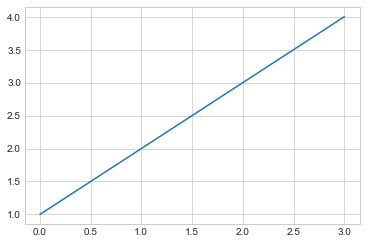

In [2]:
a=[1,2,3,4]
plt.plot(a)
plt.show

plt.style.use("seaborn-whitegrid")  satırı sayesinde yukarıdaki çıktıda bulunan grafiğin arka planında ızgara görünümü bulunmaktadır.

Peki başka tarzları nasıl elde edebiliriz?:

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Kullanabileceğimiz bütün tarzların listesi çıktıda görüldüğü gibidir.

<font color = 'Orange'>
1-LOAD AND CHECK DATA

In [4]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
test_PassengerId = test_df["PassengerId"]  #test_df'nin PassngerId feature'sinin orjinalini kaybetmemek için bir değişkene atadık.

Data'yı inceleyelim.

In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Görüldüğü üzere 12 tane column yani feature mevcut.

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


df'nin ilk 5 satırını görüntüledik.

Çıktıyı okuyalım. Mesela Ticket sütunu bilet numarasını ifade eder. Fare sütunu bileti almak için ödenen tutarı ifade eder. Cabin sütunu hangi kabinde bulunulduğunu ifade eder. Embarked sütunu hangi limandan bu gemiye binildiğini ifade eder.

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Sayısal sütunlarla ilgili bazı istatistiksel bilgileri elde ettik.

Çıktıyı inceleyelim. Mesela maksimum 80 yaşında ve minimum 0.42 yaşında insanların bulunduğu bir gemi olduğu sonucuna varabiliriz.

<font color = 'Orange'>
2-VARIABLE DESCRIPTION

1- PassengerId

2- Survived

3- Pclass

4- Name

5- Sex

6- Age

7- SibSp

8- Parch

9- Ticket

10-Fare

11-Cabin

12-Embarked
    
Şimdi her birini veri seti üzerinde gözlemleyerek inceleyelim. 

In [8]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<font color = 'OliveDrab'>
PassengerId : Bulunan yolcuların yolcu numarasını ifade eden feature'dir. Unique değerler barındırır.

Survived : 0 değeri yolcunun titanik kazası sonucunda öldüğünü ifade eder, 1 değeri yolcunun hayatta kaldığını ifade eder.

Pclass : 1,2 ve 3 değerlerini alabilir. 1 ddeğeri 1.sınıf, 2 değeri 2.sınıf ve 3 değeri 3.sınıf anlamına gelir. Yani yolcuların sınıflarını ifade eder.
    
Name : Yolcu ismini ifade eder.
    
Sex : Yolcuların cinsiyetlerini ifade eder.
    
Age : Yolcuların yaşlarını ifade eder.
    
SibSp : sib, siblings'in kısaltmasıdır ve anlamı kardeşlerdir. Sp ise Spouses'in kısaltmasıdır ve eş yani karı koca anlamındandır. Mesela Harris'in 1 tane kardeşi olduğunu anlayabiliriz.
    
Parch : par , parent'tır. ch ise children'dir. Mesela Harris'in Pach değeri 0 ve bunun anlamı, Harris'in çocuğuda yok aileside yok. Parch değerinin 1 olması, kişisin gemi içerisinde anne ve babası olmak üzere bir ailesi var ya da çocukları var anlamına gelir.
    
Ticket : Bilet numarasıdır.
    
Fare : Bu bileti almak için ödediğimiz para miktarıdır.
    
Cabin : Kişinin gemi içerisinde kaldığı oda numarasıdır.
    
Embarked : Gemiye hangi limandan binildiği bilgisidir. 3 adet liman var ve bunlar; C=Cherbourg, Q=Queenstown, S=Southampton şeklindedir.

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


info() metodu ile veri seti hakkında bilgiler edinebiliriz.

Çıktıyı inceleyelim. pandas dataframe'ini kullandığımızı görüyoruz. 891 tane yolcu mevcut. 12 tane column var. Her bir column isimlerini ve column'da bulunan değerlerin veri tiplerini görebilmekteyiz. Toplamda 2 tane float, 5 tane int ve 5 tane string bulunduğunu görmekteyiz.

<font color = 'Orange'>
3-UNIVARIATE VARIABLE ANALYSIS

Değişkenleri birer birer incelicez. Univariate variable analysis yaparken iki kısma ayrıcaz:

    🟡 Categorical Variable Analysis
    
    🟡 Numerical Variable Analysis

<font color = 'DarkSlateGray'>
    
🟡 Categorical Variable

Categorical variable: İki veya daha fazla kategoriden oluşan feature'lerdir. 

Mesela Survived feature'si categorical variable'dir. Çünkü iki adet farklı değer barındırır. 1=hayatta kalmıştır, 0=hayatta değildir.

Sex feature'si kadın ve erkek olmak üzere iki farklı değer barınıdırır.

Pclass feature'si 1.sınıf, 2.sınıf ve 3.sınıf olmak üzere 3 farklı değer barındırır.

Embarked feature'si C , Q ve S olmak üzere 3 farklı liman bilgisi barındırır.

Cabin fature'si, Name feature'si, Ticket feature'si, Sibsp feature'si ve Parch feature'si bir çok farklı kategoriye sahiptir.

Sonuç olarak:

    
<font color = 'Blue'>  
      Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp, Parch

<font color = 'DarkSlateGray'>
🟡 Numerical Variable

Numerical Variable: Sayılardan oluşan değişkenlerdir.
    
Sonuç olarak:
    
    
<font color = 'Blue'> 
      Numerical Variable: Fare, age, passengerId

## Categorical Variable

Categorical variable'leri görselleştirmek için öğrendiğimiz yöntemlerden birisi olan matplotlib kütüphanesini kullanacağız ve bunun için bir metod yazalım.

In [10]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    var = train_df[variable]  #Cinsiyet (Sex) variable'sini kullanarak var isimli bir değişken oluşturduk. ve var değişkeni içerisinde cinsiyetleri bulunduruyor.
    varValue = var.value_counts()  #cinsiyetten kaç tane olması gerektiğini sağlıyor. 
    
    #Şimdide görselleştirelim.
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")  #y label kategorilere ait sample'lerin sayısıdır.
    plt.title(variable)
    plt.show()
    
    print("{}: \n {}".format(variable,varValue))

.value_counts() metodu ile feature'nin içerisinde kaç tane kategori olduğunu ve bu kategorilere ait kaç tane sample olduğu bilgisini elde edebiliriz.

Metodu kullanabilmek için gerekli olan kod satırını yazalım.

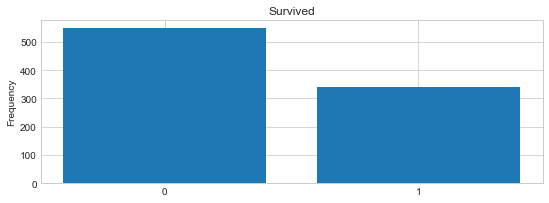

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


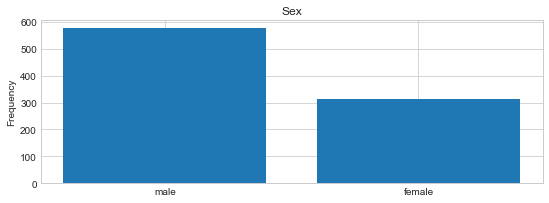

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


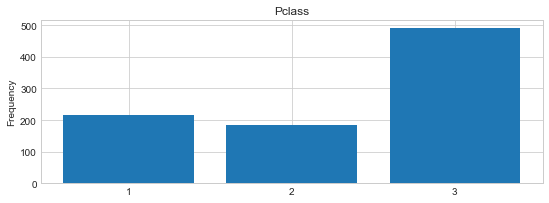

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


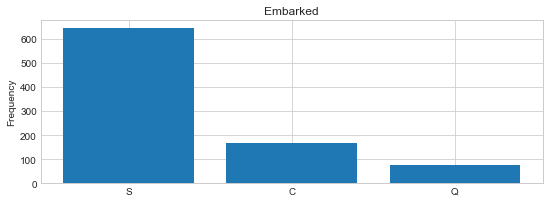

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


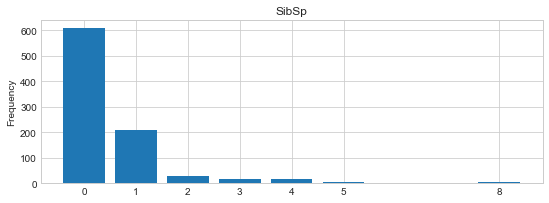

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


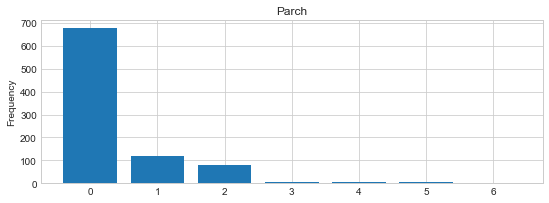

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [11]:
category1= ["Survived", "Sex", "Pclass","Embarked","SibSp","Parch"]
for c in category1:
    bar_plot(c)

Çıktıda sırasıyla feature'leri elde ettik. Çıktıda bulunan bu feature'leri inceleyelim.

Survived feature'sinin içerisinde 2 tane kategori var. 0=hayatta kalmayanlar ve 1=hayatta kalanlar şeklinde 2 kategoriye sahip. 549 kişi hayatta kalmamıştır ve 342 kişi hayatta kalmıştır.

Survived variable'si ile ilgili şöyle bir yorum yapabiliriz; 891 tane yolcudan 549 tanesi hayatta kalmamış ve 342 tanesi hayatta kalmış Yani bunlar yarı yarıya değil. Sonuç olarak survived variable'sinin dengeli olmadığı yani unbalanced olduğu anlaşılır.

Sex feature'sini inceleyelim. Cinsiyet ile ilgili male ve female olmak üzere 2 tane kategori mevcut. 577 tanesi erkek ve 314 tanesi kadındır. Sex variable'si dengesiz bir dağılıma sahiptir. Mesela bir yolcu geldiğinde bu yolcunun cinsiyetini tahmin etmek istersek, Sex dağılım oranlarına göre yolcu erkektir diyebiliriz.

Pclass feature'sini inceleyelim. 1.sınıf (en zenginler) , 2.sınıf (ortalar) ve 3.sınıf (en fakirler) olmak üzere 3 tane kategori mevcut. 3.sınıfa ait 491 tane yolcu, 1.sınıfa ait 216 tane yolcu ve 2.sınıfa ait 184 tane yolcu vardır. 

Embarked feature'sini inceleyelim. 3 tane kategori mevcut. S limanından 644 tane, C limanından 168 tane ve Q limanından 77 tane yolcu binmiş.

Mesela şöyle bir yoruma ulaşabiliriz. Pclass feature'si ile Embarked feature'si arasında bir ilişki kurabiliriz. Embarked feature'sinin Q limanından çok az sayıda yolcu binmiş. Pclass feature'sindede 1.sınıfta kalan yolcuların az sayıda olduğu görülmekte. Dolayısıyla 1.sınıfta kalan yolcuların limanı Q olabilir diyebiliriz. 

SibSp feature'sini inceleyelim. / tane kategori var. Hiç kardeşi olmayan (0 kategorisi) 608 kişiymiş. 1 tane kardeşi ya da eşi (1 kategorisi) olan yolcu sayısı 209 kişiymiş. 

Parch feature'sini inceleyelim. 7 tane kategori var. 678 kişinin diğer insanlarla bir bağlantısı yokmuş (0 kategorisi).

Categorical olduğunu bildiğimiz ama görselleştirme yaptığımızda karmaşa yaratacağından emin olduğumuz geri kalan categorical variable'leri anlatalım.

In [12]:
category2 = ["Cabin","Name","Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64 

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 



Çıktıda Cabin, Name ve Ticket feature'lerine ait kaç adet kategori olduğunu görebiliyoruz.

Mesela B96 B98 kategorisinden 4 tane varmış. G6 kategorisinden 4 tane varmış.

## Numerical Variable

Numerical variable yapabilmemiz için histogram plot ettiren bir metod yazacağız. Öncesinde histogramın ne olduğunu hatırlayalım.

Mesela bir topluluktaki insanların yaşları 5, 15, 20 olsun. 5 yaşında olan 100 kişi, 15 yaşında olan 200 kişi ve 20 yaşında olan 150 kişi olsun. Bu durumda histogram, toplulukta bulunan insanların yaşlarının dağılımını gösteren bloktur.

In [13]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(train_df[variable], bins=50)  #train_df 'nin variable'lerini sırasıyla çağırdık.
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

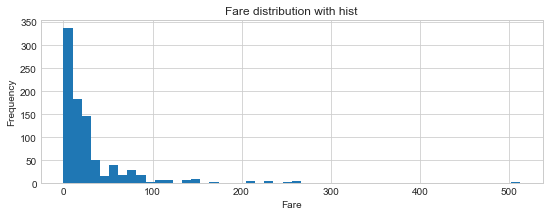

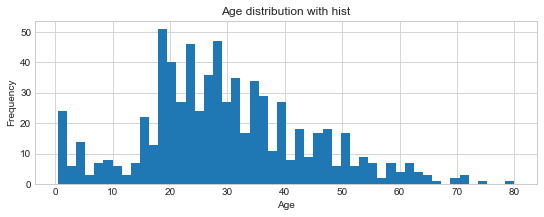

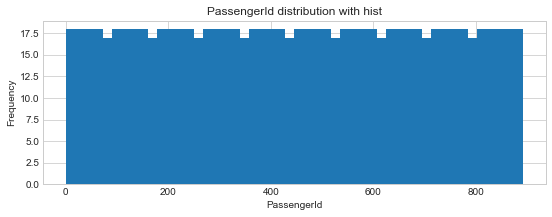

In [14]:
#numeric variable'lerin listesini oluşturalım.

numericVar = ["Fare", "Age", "PassengerId"]
for n in numericVar:
    plot_hist(n)

Çıktıda Fare, Age ve PassengerId için histogramları görmekteyiz.

Çıktıyı inceleyelim. Fare feature'si biletlere ödenen para miktarını ifade eder. Histogramda görüldüğü üzere 100 doların üzerinde veren kişi sayısı çok az. Böylelikle ödenen paranın dağılımını elde edebiliyoruz.

Age feature'sine ait histograma baktığımızda, 20 ve 30 yaşları arasında bir toplanma görünüyor. 70 yaşından büyük yolcu sayısı giderek azalıyor ve 0 ile 10 yaş arasında fazla sayıda çocuk olduğu gözlemlenebiliyor.

<font color = 'Orange'>
4-BASIC DATA ANALYSIS

Bazı feature'lerin birbirleriyle ilişkilerini incelicez:

Pclass - survived

Sex - survived

SibSp - survived

Parch - survived

In [15]:
train_df[["Pclass","Survived"]]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


Data frame içerisinde bulunan diğer feature'leri yok sayarak sadece Pclass ve Survived 'ı elde ettik.

In [16]:
#Pclass vs survived 
#İnsanların sınıfları ile hayatta kalmaları arasında nasıl bir orantı olduğunu inceleyelim.

train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


 Pclass'ın survived'a olan etkisini görmek için Pclass ve survived'i içeren data frame'i Pclass'a göre groupby yaparız. groupby ile grupladıktan sonra neye göre yazdırma yapması gerektiğini belirtmeliyiz. Burada grupla ve ortalamasını göster dedik.
 
 Sonucu sıralı göstermek için şöyle yaparız:

In [17]:
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Çıktıyı yorumlayalım. 1.sınıf kategoriye sahip yolcuların hayatta kalma olasılıklarının 0.62 olduğunu görüyoruz. Yani %62 olasılıkla 1.sınıftaki bir yolcu titanik gemi kazası sonucunda hayatta kalmış. 3.sınıfta kalan bir yolcu kaza sonucunda %24 olasılığında hayatta kalmış.

Şimdide cinsiyet (Sex) ile hayatta kalma (Survived) oranı arasındaki ilişkiyi incceleyelim.

In [18]:
#Sex vs survived

train_df[["Sex","Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Çıktıyı yorumlayalım. Kadınlar %74 oranında hayatta kalmış ve erkekler %18 oranında hayatta kalmış. 

Şimdi de bir kadeşe veya eşe sahip olma durumu ile hayatta kalma arasındaki ilişkiyi inceleyelim.

In [19]:
#SibSp vs survived

train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Veri setinden SibSp ve Survived feature'lerini aldım. SibSp feature'sine göre gruplama yaptım. Ve hayatta kalmanın ortalamasına bakmak için mean() metodunu kullandım. Ve sonra ortalamayı azalan sırada çıktıya yansıttım.

Çıktıyı yorumlayalım. Yanında 1 tane kardeşi ya da eşi olan yolcuların hayatta kalma olasılığı %53 ile en yüksek orana sahip. Yanında 2 kişi olanların hayatta kalma oranları %46, gemiye yalnız binenlerin hayatta kalma oranı %34 dür. Yanına 2 'den fazla kişi olanların hayatta kalma oranlarının çok daha az olduğu görülmektedir.

Mesela bu çıktıdan yeni bir feature elde edebiliriz. 7 tane kategoriyi 2 tane kategoriye düşürelim. Bir tane threshold belirleriz. 2 sayısı threshold olsun. 2 ve 2'nin altındakileri bir gruba toplarım ve bunların hayatta kalma olasılıkları 2'den büyüklere göre çok daha yüksek olur.  

In [20]:
#Parch vs survived

train_df[["Parch","Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Parch ile Survived feature'lerini birleştirdim yani bir araya topladım. Sonrasında bunları Parch feature'sine göre grupladım ve sonra ortalamalarını aldım. Sonrada sonucu azalan sırada yazdırdım.

Çıktıyı yorumlayalım. Yolcunun yanında ebeveyn veya çocuk olmak üzere 3 kişi var ise %60 oranında hayatta kalma durumu söz konusu. 

Parch değeri arttıkça yani 4, 5 ve 6 değerleri için görüldüğü üzere hayatta kalma olasılığı azalıyor. 

Sonuç olarak, birbirleriyle alakasız feature'ler keşfedersek bunlardan yeni feature oluşturabiliriz. Ya da bunları ayrı ayrı kullanabiliriz. 

<font color = 'Orange'>
4-OUTLIER DETECTION

Outlier kavramını hatırlayalım. Mesela bir iş yerinde çalıştığınızı düşünün. Ve sırasıyla 1,4,5,6,8,9,11,12,13,14,15,16,17,100 şeklinde maaşlar var. Burdan outlier'ı yani ayrık olan sayıyı bulmaya çalışıcaz. 

Outlier detection şu yüzden önemli: Modeli düzgün bir şekilde eğitebilmemiz için istatistiksel anlamda belli başlı veriyi bozan ayrık değerlerden kurtulmamız gerekiyor. 

1,4,5,6,8,9,11,12,13,14,15,16,,17100 sayılarının ortalaması 52'dir. Patron çalışanlara verdiği ortalama maaşa göre zam yapıcak diyelim. Patron ortalamanın 52 olduğunu gördüğünde bu değer çok iyi olduğu için zam yapmaktan vazgeçer. Ama bu 52 değerini ortaya çıkartan 100 değeridir. Bu 100 sayısı outlier'dir. Yani kısacası istatistiksel anlamda veriyi bozan sample'leri outlier olarak adlandırabiliriz.

Başka bir deyişle, öyle bir değer düşünün ki verinin geri kalan değerlerinden çok büyük ya da çok küçük. İşte bu değer outlier'dır.

Peki outlier'ı çıkartmak neden önemli?: Çünkü bu durum istatistiksel anlamda karar vermemizi zorlaştırır. Mesela patron 50 değerini duyunca çalışanlarına verdiği maaşın iyi olduğunu ve zam yapmasına gerek olmadığını düşünecek. Ama bu 50 değerini elde etmemize sebep olan 100 değerinde maaşa sahip olan kişidir. Geri kalan çalışanların maaşı 50'den çok daha azdır. Buradaki outlier'ı tespit edip çıkarırsak ortalama 12 olur ve patron zam yapma kararı alır.

Şimdi outlier'ı nasıl bulacağımıza bakalım.

Öncelikle 1 st quartile = Q1 şeklinde bir tanım var.

3 rd quartile = Q3

Q1 ve Q3 quartile'leri tespit edebilmemiz için arada 2 nd quartile dediğimiz ve median olarak adlandırdığımız Q2 değeri var.

Median: Listenin içerisinde bulunan sayıların ortasındaki sayıdır. Yukarıdaki listede, sağ tarafta 7 tane sol tarafta 7 tane sayı olacak şekilde konumlandığımızda ortadaki sayı 11.5'tir. 11.5 sayısı median değeridir. 


                      Median
1  4  5  6  8  9  11   11.5   12  13  14  15  16  17  100

Q1 değeri median ile 1 değeri arasındaki sayıların ortasındaki sayıdır. Bu durumda Q1=6 'dır.

Q3 değeri ise median ile 100 değeri arasındaki sayıların ortasındaki sayıdır. Bu durumda Q3=15 'dir.

IQR = Q3-Q1 = 9

Bu 9 sayısını 1.5 ile çarpımı outlier tespitindeki adımımızdır.

outlier = 9 x 1.5 = 13.5

Şimdide:

Q1 - 13.5             ya da       Q3 + 13.5

6 - 13.5 = -7.5                   15 + 13.5 = 28.5

Şimdi bu elde ettiğimiz değerleri listede sıralama açısından uygun yerlere yerleştirelim.

-7.5  1  4  5  6  8  9  11   11.5   12  13  14  15  16  17  28.5  100

Burada -7.5 ve 28.5 aralığın dışındaki sayılar outlier'dır. Burada bu aralığın dışında kalan sayı 100 dür ve 100 değerinin outlier olduğunu tespit etmiş olduk.

Bu diziden sağlıklı istatistiksel sonuçlar çıkarabilmek için 100 sayısını listeden çıkarmamız gerekmektedir. Eğer outlier'ı yani 100 sayısını çıkartmazsak istatistiksel anlamda doğru bilgiler elde edemem. Dolayısıyla machine learning modelimizi doğru bir şekilde eğitemeyiz.

In [21]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        
        # IQR
        IQR = Q3-Q1
        
        # Outlier step
        outlier_step = IQR*1.5
        
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1-outlier_step) | (df[c] > Q3+outlier_step)].index 
        #Bir yukarıdaki kod ile outlier'ları içerisinde bulunduran bir data frame elde etmiş oluyoruz. Outlier'ların indeksini almak içinde .index yazarız.
        
        #store indeces (Bu adım ile amaçlanan, bulduğumuz indeksleri depolarız ve böylece daha sonradan bunları çıkarabiliriz)
        outlier_indices.extend(outlier_list_col) #indeksleri outlier_indices'in içerisinde depolamış oldum. 

    outlier_indices = Counter(outlier_indices)  #Bu satır ile hangi yolcunun kaç tane outlier içerdiğini öğrenebiliriz.
    
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2) #Eğer bir tane sample'de 2'den fazla outlier var ise bunu çıkartmak için indeksini tutarız. Ama bir tane outlier var ise çıkartmayız.
    
    return multiple_outliers

Yukarıdaki kodu anlatalım. metod parametre olarak data frame'i ve outlier'ı detect etmek için kullanacağımız feature'leri alır.

Sayısal değerler için outlier detection yaparız. Feature'leri bir for döngüsünde döndürerek tüm outlier'ları tespit ettik.

Counter() metodu listenin içerisinde bulunan elemanların kaçar tane olduğunu hesaplar.

Counter() metodunun sonucuna ihtiyacımız var çünkü bir yolcunun tek bir feature için outlier'ı var ise o yolcuyu çıkartmak çok doğru olmaz fakat birden fazla feature için outlier değeri var ise yolcuyu yani sample'ı çıkartmak gerekbilir.

In [22]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]  #outlier'ları tespit etmek istediğimiz feature'leri yazdık.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


Çıktıda outlier'ları görüyoruz. 

Şimdide outlier'ları kaldıralım.

In [23]:
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis=0).reset_index(drop=True)

<font color = 'Orange'>
5-MISSING VALUE

Veri setinde non value olarak adlandırabileceğimiz missing yani boş değerlere bakıcaz. Boş değerleri herhangi bir machine learning modelini eğitmek için kullanamayacağımıza göre onlardan nasıl kurtulacağımıza veya onları nasıl dolduracağımıza bakalım.

Missing value içerisinde iki tane alt başlık bulunmakta:

<font color = 'Red'>
    🟢 Find Missing Value
    
<font color = 'Red'>    
   🟢 Fill Missing Value

Missing value'leri bulmadan önce data frame'leri birleştirmemiz gerek. Data frame'leri birleştirmekten kasıt şudur: bir train_df miz var. Birde test_df miz var. Missing value'leri atabilmek ya da onları doldurabilmek için test data frame'in içerisindeki değerlerede bbakmalıyız. Çünkü eğer missing value'leri sadece train data frame'inde doldurursak bunların machine learning'te eğitimini gerçekleştirdiğimiz zaman bu machine learning modelimiz test data frame'in içerisindeki boş değerleri gördüğü zaman hata verecektir, bunları tanıyamayacaktır. Bu nedenle train ve test data frame'lerini birleştiricez ve daha sonrada missing value problemini ortadan kaldırıcaz.

In [24]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis=0).reset_index(drop=True)  #Yukarıdan aşşağıya train_df ve test_df'yi birleştirdik.

In [25]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Find Missing Value

In [26]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

train data frame'in içerisinde herhangi bir null değere sahip olup olmadığını bulduk ve hangi feature'lerde missing value olduğunu tespit ettik. 

Çıktıda missing value'lerin hangi feature'lerde olduğunu görebiliriz. Birde kaç tane olduğunu öğrenelim.

In [27]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

256 tane sample'de age ile ilgili feature boş. Yani 256 tane yolcunun yaş değeri bilinmiyor. 1007 tane yolcunun Cabin bilgisine sahip değiliz. 2 tane yolcunun hangi limandan (Embarked) bindiğini bilmiyoruz. 1 tane yolcunun biletini ne kadar fiyata satın aldığını (Fare) bilmiyoruz. 418 yolcununda hayatta kalıp kalmadığını bilmiyoruz. 

Survived 'a karşılık gelen 418 değeri test data frame'in boyutuna eşit oluyor çünkü 418 adet bilinmemesi onun test veri seti olmasından kaynaklı.

## Fill Missing Value

Embarked ve Fare feature'lerinin missing value'lerini dolduralım.

Missing value'leri doldurmak yerine train veri setinden çıkartmak isteyebiliriz ama veriyi kaybetmektense doldurmak tercihimizdir.

In [28]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Çıktıda görüldüğü üzere, 60 ve 821. id 'lere sahip iki yolcunun nereden bindikleri belli değil. Bunu Embarked sütunundaki değerlerin NaN olmasından anladık. 

Bu NaN değerleri şunlara göre doldurabiliriz:

Pclass feature'sini baz alarak 1.sınıfa ait yolcuların hangi limandan bindiğine bakarız ve elde ettiğimiz bilgi ile Embarked feature'sindeki NaN değerleri doldurabiliriz.

Fare feature'si baz alınarak ta doldurma işlemi yapılabilir. Aşağı yukarı 80.0 para ödeyen insanların hangi limandan bindiklerine bakarız ve ona göre Embarked featuresindeki NaN değerleri doldurabiliriz.

Fare feature'sini kullanarak analiz yapalım.

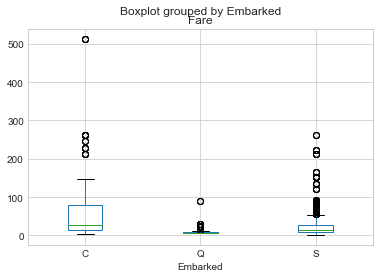

In [29]:
train_df.boxplot(column="Fare",by="Embarked")
plt.show()

Medyan değerleri her bir dikdörtgenin ortasındaki çizgidir. C'nin ortasındaki çizgi 100 değerine yakın. Q'daki meydan değeri çok düşük bu durumda bunların ödedikleri para çok az ve dolayısıyla bunların sahip oldukları cabin'ler ve Pclass değerleri çok düşük yani bunlar büyük ihtimalle 3.sınıfta seyahat eden yolculardır ve bunlar genellikle Q limanından binmişler. S 'nin medyan değeri C'ye göre daha düşüktür ve bunun anlamı S limanından binen yolcular büyük ihtimal 2.sınıfta seyahat edenlerdir. 

Embarked değeri NaN olan iki yolcunun Fare değerleri 80 miş. 80'e en yakın C dir ve bu durumda C limanından binmiş olma olasılıkları çok yüksektir. Dolayısıyla bu iki yolcunun Embarked değerlerini C olarak doldurabiliriz.

In [30]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")

Yukarıdaki kod ile boş olan Embarked değerlerinin C ile doldurulması sağlanmıştır.

Şimdi doldurabilmişmiyiz kontrol edelim.

In [31]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Çıktıda görüldüğü üzere artık Embarked feature'sinde herhangi bir boş değer bulunmamaktadır.

Şimdide hangi yolcumuzun Fare değerinin olmadığına bakalım. 

In [32]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


1033 nolu yolcunun Fare değeri yok yani bu yolcunun ne kadar para ödediğini bilmiyoruz. 

Burda yola çıkabileceğimiz iki tane featur var. Birincisi hangi limandan bindiği (Embarked) ve diğeri sınıfı (Pclass).

Pclass featuresinden yola çıkalım.

In [33]:
np.mean(train_df[train_df["Pclass"]==3]["Fare"])

12.741219971469327

Pclass'ı 3 değerine sahip olan yolcuları listeledik. Bunu kullanarak sadece Fare 'e baktık. Ve bunların ortalamasını aldık. Böylece 3.sınıfta seyahat eden yolcuların ortalama ne kadar ödedikleri bilgisini elde ettik.

Ortalama 12.7 tutarında ödeme yapmışlar. Şimdi Fare featuresindeki NaN değerleri 12.7 ile dolduralım.

In [34]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"]==3]["Fare"]))

In [35]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Çıktıda görüldüğü üzere artık Fare featuresinde herhangi bir boş değer bulunmamaktadır.

Buraya kadar olan kısmı DataScience isimli repository'de bulunan TitanicProject dökümanında gerçekleştirmiştim. Şimdi ise Titanik projesine Data Visualization konularını uyarlayarak devam edelim.

# VISUALIZATION

## Korelasyon Matrisi

SibSp, Parch, Age, Fare, Survived sütunları arasındaki korelasyon matrisini oluşturalım. Bunun için Seaborn kütüphanesinden faydalanacağız.

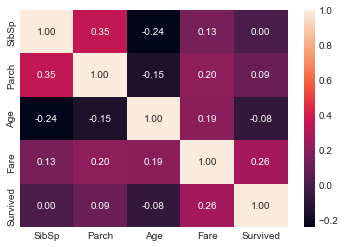

In [36]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"] 
sns.heatmap(train_df[list1].corr(), annot=True, fmt=".2f")
plt.show()

<font color = "Chocolate"><br>
list1 = ["Sibsp", "Parch", "Age", "Fare", "Survived"]

Bu satırda, aralarındaki korelasyonu inceleyeceğimiz feature'leri içeren bir liste oluşturdum.

<font color = "Chocolate"><br>    
sns.heatmap(train_df[list1].corr(), annot=True)

Bu satırda, 1.parametrede list1 içerisindeki sütunlar arasındaki korelasyona bakmamızı sağlayacak corr() metodunu çağırdım. 2.parametre ile korelasyon matrisinin üzerindeki değerleri görebilmemizi sağladım. 3.parametre ile de virgülden sonra iki basamağın görüntülenmesini sağladım.

Çıktıyı inceleyelim. Survived feature'sinin diğer feature'ler ile ilişkisine baktığımızda en çok 0.26 oranında Fare sütunu ile ilişkili olduğunu görüyoruz. Yani Survived feature'si Fare feature'si ile yüksek korelasyona sahiptir. Bunun anlamı, gemiye binen yolcular bilet için çok fazla para ödedilerse (Fare) hayatta kalma şansları yüksek (Survived) anlamına gelir.

# Özellik Analizi

<font color = "IndianRed"><br>
SibSp ve Survived feature'leri arasındaki ilişkiyi inceleyelim.

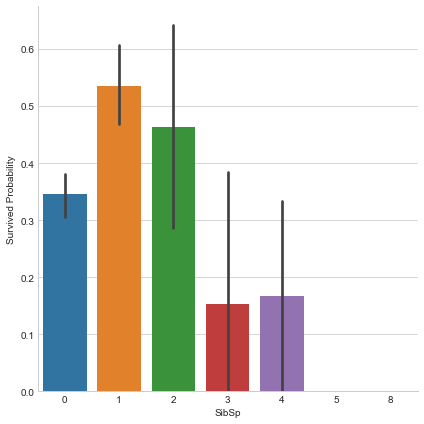

In [37]:
g = sns.factorplot(x = "SibSp", y = "Survived", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

y ekseninde Survived Probability ve x ekseninde SibSp değerlerini görebildiğimiz bir bar plot elde ettik. 

Çıktıyı yorumlayalım.

Survived feature'si ile yolcunun hayatta kalıp kalmadığını anlıyorduk. Eğer 1 ise yolcu hayatta kalmış demektir, 0 ise yolcu hayatta kalamamış demektir. 

SibSp feature'si ile yolcunun sahip olduğu kardeş ya da eş sayısını elde ediyoruz. Mesela bir yolcunun SibSp değeri 3 ise 3 tane kardeşe veya eşe sahip demektir.

Çıktıda görüyoruz ki, hiç kardeşi olmayan, 1 kardeşi olan, 2 kardeşi olan yolcuların hayatta kalma olasılıkları gayet iyi bir değerde. Fakat SibSp değeri 3 ve sonrasındaki değerler için yolcunun hayatta kalma olasılığı ciddi bir şekilde azalıyor.

Eğer yolcu 2'den fazla SibSp değerine sahip ise Survived Probability azalıyor sonucuna varabiliriz. Bu yorum ile yeni bir feature elde edebiliriz. Mesela SibSp2 isimli yeni bir feature oluştururuz ve threshold olarak 2 değerini belirleriz. Ve 2 ve daha az sayıda SibSp değerine sahip olanlar 1, 2 'den büyük SİbSP değerine sahip olanlar 2 olsun. Böylelikle 2 tane kategoriye sahip olan yeni bir feature elde etmiş olurum ve bu feature'yi machine learning modelini eğitmek için kullanabiliriz.

<font color = "IndianRed"><br>
Parch ve Survived feature'leri arasındaki ilişkiyi inceleyelim.

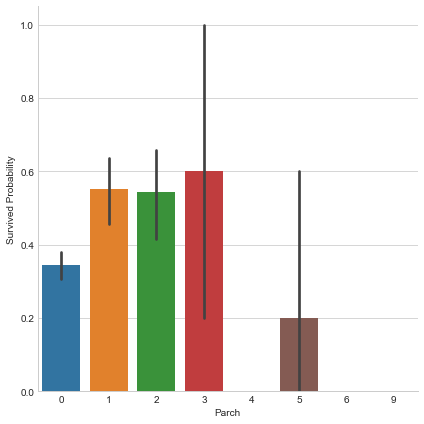

In [38]:
g = sns.factorplot(x = "Parch", y = "Survived", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

Parch feature'si bir yolcunun sahip olduğu aile (anne,baba) ve çocuk sayısı bilgisini verir. Mesela Parch değeri 3 ise yolcunun 3 tane annesi babası ya da çocuğu var demektir.

Çıktıyı yorumlayalım. Yalnız gelen kişiler (Parch=0), Parch değeri 1,2,3 olan kişilere göre daha az hayatta kalma olasılığına sahiptir. 

Parch değeri 1 ve 2 olan yolcuların genelde hayatta kalma olasılığı aynı diyebiliriz.

Bar'ların ortasındaki siyah çizgiye standart sapmayı ifade eder.

Mesela Parch değeri 3 olan sapmle'ın hayatta kalma olasılığı 0.6 ama bu ortalama değeridir. Bu değer siyah çizgiye bakıldığında 1 de olabilir 0.2 de olabilir. Yani 0.2 ve 1 aralığında değişken bir değere sahiptir, ortalama olarak 0.6'dır. 

<font color = "IndianRed"><br>
Pclass ve Survived feature'leri arasındaki ilişkiyi inceleyelim.

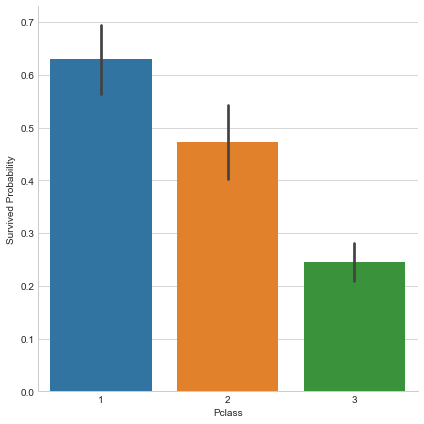

In [39]:
g = sns.factorplot(x="Pclass",y="Survived", kind ="bar", data=train_df, size=6)
g.set_ylabels("Survived Probability")
plt.show()

Çıktıyı yorumlayalım.

y ekseninde hayatta kalma oranları bulunmakta. x ekseninde Pclass değerleri mevcut.

Pclass feature'si yolcuların seyahat ettikleri sınıfları ifade ediyor. 1.sınıf, 2.sınıf, 3.sınıf şeklinde 3 kategoriye sahip. 1.sınıf en pahalı olan, 2.sınıf orta, 3.sınıf en ucuz olan kısımdır.

1.sınıfta seyahat eden yolcuların hayatta kalma olasılıkları 2. ve 3.sınıflara göre daha yüksektir.

<font color = "IndianRed"><br>
Age ve Survived feature'leri arasındaki ilişkiyi inceleyelim.

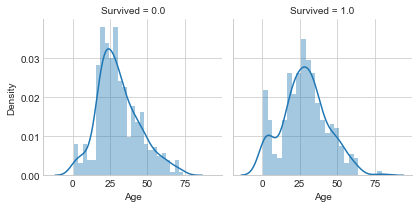

In [40]:
g = sns.FacetGrid(train_df, col="Survived")
g.map(sns.distplot, "Age", bins=25)  #Age, karşılaştıracağımız feature'dir.
plt.show()

Çıktıda gördüğünüz üzere 2 tane plot elde ettik. Survived=1.0 yazan plot'ta hayatta kalanların dağılımını, Survived=0.0 yazan plot'ta hayatta kalmayanların dağılımını görüyoruz. Survived=1.0 plot'unda Age değerinin 0-10 olduğu aralıkta çocukların kurtulduğunu görüyoruz.

Yaş özelliği doğası gereği Gaussian dağılıma sahiptir. Burdada aşşağı yukarı bir gaussian dağılımı olduğunu görebiliyoruz.

Survived=1.0 plot'unda Age değerinin 70'den sonraki aralıkta yaşlılarında büyük olasılıkta kurtulduğunu görüyoruz. Burada yaşlı insanların az olmasından kaynaklı düşük çizgi söz konusu.

Survived=0.0 plot'unda 20-30 yaş arası insanların ölüm oranı çok iken, Survived=1.0 plot'unda 30-35 yaş arası insanlarda hayatta kalma oranı daha yüksek görünüyor.

15 ve 35 yaşları arasında çok fazla yolcu olduğunu görebiliyoruz.

Age feature'sini tahmin yapmak için kullanabiliriz. Yani maching learning'te eğiteceğimiz feature'lerden bir tanesi Age feature'si olur. 

Ayrıca plot'taki dağılımları kullanarak Age feature'sindeki missing value'leri doldurabiliriz.

<font color = "IndianRed"><br>
Pclass, Survived ve Age feature'leri arasındaki ilişkiyi inceleyelim.

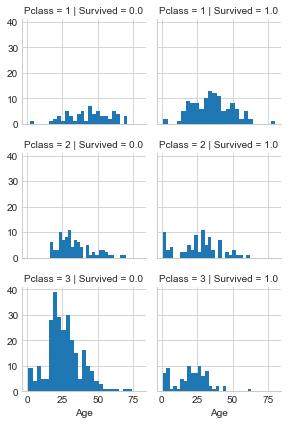

In [41]:
g = sns.FacetGrid(train_df, col="Survived", row="Pclass", size=2)
g.map(plt.hist, "Age", bins=25)
g.add_legend()
plt.show()

x ekseninde yaşlar bulunmakta. 6 tane plot mevcut. Plot'larda satırlarda Pclass değerleri var. Sütunlarda ise Survived değerleri var.

En alttaki plot'lara baktığımızda çok fazla yolcu olduğunu görebiliyoruz. Bunun anlamı, Pclass=3 'e ait yolcu sayısı, 1. ve 2.sınıflardaki yolcu sayılarından daha fazla. Ama yolcu sayısının fazla olması ile yolcuların yaşaması arasında herhangi bir doğru orantı yok hatta ters orantı var diyebiliriz. Yolcu sayısı fazla ise daha çok ölüm görülmüştür.

Pclass=3 iken ölüm oranı, yaşama oranından daha yüksek. Pclass=2 olduğunda ölüm ve yaşama oranı biraz daha dengeli görünüyor. Pclass=1 iken yaşama oranı, ölüm oranından daha yüksektir.

Sonuç olarak, Pclass değeri prediction yapmamızda, modeli eğitmemizde önemli bir feature olucak.

<font color = "IndianRed"><br>
Embarked, Sex, Pclass, Survived feature'leri arasındaki ilişkiyi inceleyelim.

Embarked: Yolcuların hangi limandan bindiği bilgisidir.
    
Sex: Yolcuların cinsiyetlerinin bilgisidir.

Pclass: Yolcuların hangi sınıfta seyahat ettikleri bilgisidir.

Survived: Yolcuların hayatta kalıp kalmadıklarına dair bilgidir.

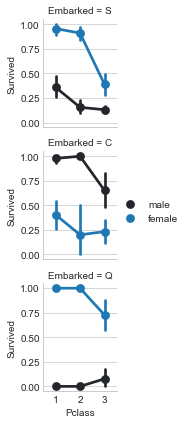

In [42]:
g = sns.FacetGrid(train_df, row="Embarked", size=2)
g.map(sns.pointplot, "Pclass", "Survived", "Sex")
g.add_legend()
plt.show()

Embarked=S plot'unda kadınlar daha yüksek. Embarked=C plot'unda erkekler daha yüksek. Embarked=Q plot'unda kadınlar daha yüksek. 2 tane plot'ta kadınlar daha yüksek ve 1 tane plot'ta erkekler daha yüksek. Dolayısıyla kadınların hayatta kalma oranları erkeklerden daha yüksektir diyebiliriz. Sex (cinsiyet) ve Survived (hayatta kalma) feature'leri birbirleri ile alakalıdır. Bu yorumu sınıflandırma yaparken kullanabiliriz. Cinsiyet (Sex) sınıflandırma yaparken ya da prediction yaparken önemli bir feature olacak. Yani hayatta kalma oranını tahmin ederken cinsiyet (Sex) özelliğini kullanabiliriz.

Şimdide Pclass ve Embarked arasındaki ilişkiye bakalım. Line 'lar üzerindeki ilk nokta 1.sınıfı, ikinci nokta 2.sınıfı ve üçüncü nokta 3.sınıfı ifade ediyor. Embarked=S plot'unda hem kadınlarda hem de erkeklerde Pclass=1'den itibaren yani 1.sınıftan başlayarak bir azalma mevcut. Aslında Pclass ve Embarked=S arasında bir ilişki mevcut. 

<font color ="SlateBlue"><br>
İki feature arasında ilişkinin olması kullanılabilir bir şey olduğu anlamına geliyor. Aynı zamanda ilişkinin olmamasıda kullanılabilir bir feature anlamına geliyor çünkü eğer iki feature arasında bir ilişki yok ise bu iki feature farklı bilgiler taşıyor olabilir.

C limanında erkeklerin hayatta kalma olasılıkları daha yüksektir. Bu bilgiyi limanları birleştirerek yeni bir feature oluşturmak istersek kullanabiliriz.

Sex ve Embarked feature'lerini doğrudan modeli eğitmek için kullanacağız.

<font color = "IndianRed"><br>
Embarked, Sex, Fare, Survived feature'leri arasındaki ilişkiyi inceleyelim.

Fare feature'si yolcuların bilet için ödedikleri parayı ifade eder.

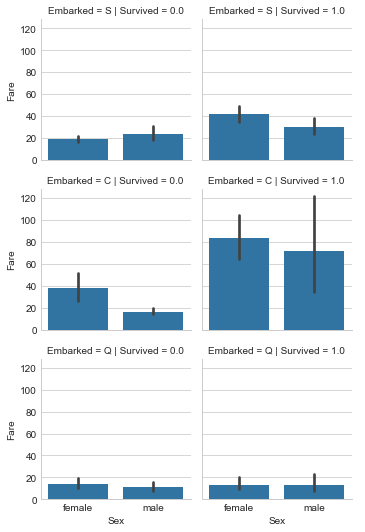

In [43]:
g = sns.FacetGrid(train_df, row="Embarked", col="Survived", size=2.5)
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

Satırlar Fare feature bilgisidir.

En üstteki plot'ta soldakinde ödenen toplam tutar 25+25=50 ve soldakinde 50+25=75 diyelim. Soldaki plot'taki insanlar hayatta kalamamışlar, sağdaki plot'taki insanlar hayatta kalmışlar. 1.satırda S limanından binen insanlar için daha çok para ödeyenler (sağdaki plot) daha az para ödeyenlere (soldaki plot) göre hayatta kalmaları daha yüksektir.

3 satırdaki her bir feature'yi incelediğimizde daha çok para ödendiği durumda hayatta kalma olasılığı artıyor. Fare feature'sine threshold'lar koyarsak Fare feature'sini categorical bir feature'ye çevirebiliriz.

S,C ve Q limanlarını karşılaştırdığımız zaman en yüksek hayatta kalma oranı C'ye, orta sıra S'ye ve en düşük Q'ya ait.

## Fill Missing: Age Feature

In [44]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1007
Embarked          0
dtype: int64

Çıktıda görebileceğiniz üzere Age feature'sinde 256 tane missing value bulunmakta. 

<font color="CadetBlue"><br>
Şimdi Age feature'sinde bulunan boşlukları bir istatistiksel modele göre doldurallım.

<a id='1'></a><br>

In [45]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Yukarıda train_df içerisindeki Age feature'sinde bulunan NaN değerleri gösterdik. 256 tane yolcunun yaş değeri bulunmamaktadır.

Mesela Cinsiyet featuresine göre bu boşlukları doldurabilir miyiz?: female'lerin ortalama yaşına bakarız ve tüm female'leri ona göre doldururuz. male'lerin ortalama yaşına bakarız tüm male'leri ona göre doldururuz. 

Pclass feature'sine göre de yapabiliriz. 1.sınıfta kalan yolcuların yaş ortalamasını bulup Age feature'sindeki boşlukları bu ortalama değere göre doldurabiliriz. 2. ve  3. sınıflar içinde aynı işlem gerçekleştirilir.

Parch ve SibSp feature'sine göre yapabiliriz. Çünkü bir yolcunun çocuğu var ise yaşının büyük olma olasılığı çocuğu olmayan bir yolcuya göre daha büyüktür diyebiliriz. Çocuk sayısına göre ya da parent sayısına göre yaşı olmayan yolcuların yaşlarını tahmin edebiliriz.

Hibrit bir şekilde de yapabiliriz. Yani hem Sex feature'sini hem Pclass feature'sini hem Parch feature'sini hem de SibSp feature'sini kullanabiliriz. 

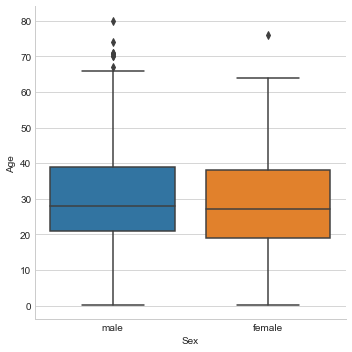

In [46]:
sns.factorplot(x="Sex", y="Age", data=train_df, kind="box")

Kutuların ortasındaki çizgi medyanı ifade ediyor. male ve female için medyan değerleri aşağı yukarı aynı. Dolayısıyla male ve female olmasına göre yaşı tahmin edemeyiz. Çünkü erkek ve kadın için medyan değerleri aynı. Bu durumda Sex feature'sini kullanmamızın pek bir anlamı yok.

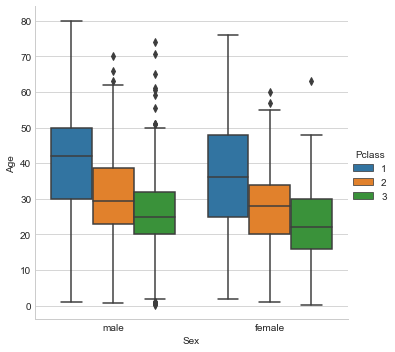

In [47]:
sns.factorplot(x="Sex", y="Age", hue="Pclass", data=train_df, kind="box")

Yukarıda sınıf olarak Pclass'ı ekledim. Her bir cinsiyet için 3 tane box plot var. Maviler 1.sınıf yolcularını, turuncular 2.sınıf yolcularını, yeşiller 3..sınıf yolcularını ifade etmekte.

1.sınıf yolcuları için:
    male'nin yaş medyanı 40 üzerinde, female'nin yaş medyanı 40'ın biraz altında. 1.sınıfta kalan yolcuların yaş medyanlarına 40 diyebiliriz.
    
2.sınıf yolcuları için:
    male ve female'nin yaş medyanları yaklaşık 30.
    
3.sınıf yolcuları için:
    male ve female'nin yaş medyanları yaklaşık 25.
    
Dolayısıyla 1.sınıfın yaş medyanları 2.sınıftan büyük ve 2.sınıfın yaş medyanları da 3.sınıftan büyüktür.

Dolayısıyla en yaşlılar 1.sınıfta ve en gençler de 3.sınıftadır diyebiliriz.

[Buradaki](#1) tabloya baktığımızda ilk satırda bulunan James'in Pclass'ında 3 değeri var yani James 3.sınıfta kalıyormuş. Bu nedenle James'in yaş ortalamasına 25 diyebiliriz.

Sonuç olarak, Pclass yaş tahmini yapmak için kullanılabilir bir feature'dir.

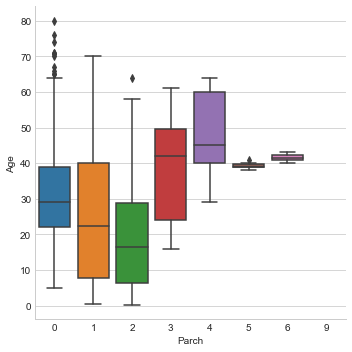

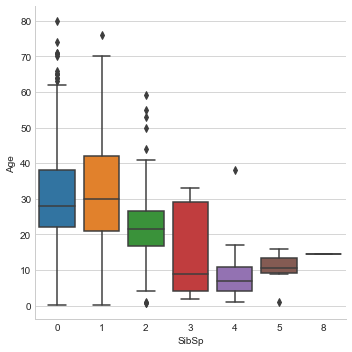

In [48]:
sns.factorplot(x="Parch", y="Age", data=train_df, kind="box")
sns.factorplot(x="SibSp", y="Age", data=train_df, kind="box")

Yukarıdaki plot'u inceleyelim.

Parch değeri 0,1 ve 2 olanlar için yaş medyanları aşağı yukarı 25'tir. Ama 2'den büyük değerler için yaş medyanı 45'tir. 

Aşağıdaki plot'u inceleyelim.

SibSp değeri 1,2 ve 3 için yaş medyanı yaklaşık 25'tir. 3'den büyük değerler için yaş medyanı neredeyse 10 civarındadır.

Şimdi de tüm feature'ler arasındaki korelasyona bakalım. Bunun için heatmap kullanırız.

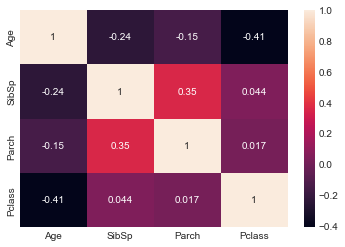

In [49]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot=True)
plt.show()

Sex ve Age arasında herhangi bir ilişki söz konusu değil. Sex feature'sini tabloda göremiyoruz. Bunun sebebi Sex feature'sinin string değerlerden oluşmasıdır. Sex feature'sini heatmap'te görebilmemiz için sayısal bir değere çevirmemiz gerekmekte. Sex feature'sini sayısal bir veri tipine dönüştürelim ve tekrar heatmap oluşturalım.

In [50]:
train_df["Sex"] = [1 if i=="male" else 0 for i in train_df["Sex"]]  
#male değerinin olduğu satırlara 1, female değerinin olduğu sütunlara 0 yazdırdım.

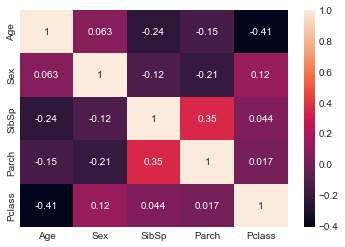

In [51]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot=True)
plt.show()

Yukarıda gördüğümüz üzere Sex feature'side artık heatmep'te bulunmakta.

Çıktıyı yorumlayalım.

Age ve Sex arasındaki ilişki 0.063 oranındadır. Yani yaklaşık 0 dır ve bunun anlamı, herhangi bir ilişki söz konusu değildir. 

Age ve SibSp arasındaki ilişki -0.24'tür. Age ve Parch arasındaki ilişki -0.15'tür. Age ve Pclass arasındaki ilişki -0.41'dir. Bu iyi bir durumdur. Bu 3 tane feature'yi kullanarak yaş ile ilgili prediction yapabilirim.

Şimdi de Age feature'sinde bulunan boşlukları dolduralım.

İlk olarak Age feature'sinde bulunan NaN value'lerin indekslerini bulalım.

In [52]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
index_nan_age

[5,
 17,
 19,
 26,
 27,
 28,
 30,
 31,
 35,
 41,
 44,
 45,
 46,
 47,
 54,
 63,
 64,
 75,
 76,
 81,
 86,
 93,
 99,
 105,
 107,
 119,
 124,
 126,
 138,
 152,
 156,
 163,
 165,
 173,
 177,
 181,
 182,
 192,
 194,
 209,
 218,
 224,
 230,
 235,
 236,
 245,
 251,
 255,
 259,
 265,
 269,
 272,
 279,
 290,
 293,
 295,
 296,
 298,
 299,
 301,
 324,
 328,
 329,
 340,
 344,
 347,
 351,
 352,
 357,
 360,
 361,
 368,
 377,
 381,
 402,
 403,
 404,
 406,
 408,
 413,
 418,
 421,
 424,
 437,
 444,
 447,
 450,
 452,
 457,
 459,
 461,
 463,
 468,
 474,
 478,
 483,
 488,
 490,
 495,
 500,
 504,
 510,
 515,
 517,
 520,
 524,
 526,
 531,
 540,
 545,
 550,
 553,
 556,
 557,
 561,
 566,
 571,
 577,
 582,
 586,
 589,
 591,
 594,
 595,
 604,
 605,
 606,
 622,
 626,
 632,
 636,
 641,
 643,
 646,
 649,
 660,
 662,
 667,
 673,
 685,
 690,
 702,
 704,
 711,
 720,
 725,
 731,
 732,
 733,
 753,
 759,
 761,
 766,
 769,
 771,
 776,
 783,
 785,
 807,
 817,
 818,
 820,
 824,
 829,
 831,
 840,
 850,
 858,
 868,
 878,
 891

Yukarıda gördüğünüz sayılar, NaN value'lerin indeksleridir.

Şimdi tek tek bu indeksleri dolaşıcaz ve bu indekslerde bulunan SibSp, Parch ve Pclass feature'lerine bakarak Age değerini tahmin etmeye çalışıcaz.

In [53]:
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) & (train_df["Parch"] == train_df.iloc[i]["Parch"]) & (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median

In [54]:
age_pred

<bound method NDFrame._add_numeric_operations.<locals>.median of 10       4.00
64        NaN
126       NaN
169      1.00
172     18.00
184     40.00
246     29.00
274     35.00
322     31.00
341      3.00
345     15.00
416     28.00
417     18.00
482      9.00
525     17.00
541     33.00
588     36.00
609     34.00
615     20.00
650     32.00
702       NaN
739     16.00
791     30.00
843      9.00
859      4.00
885     22.00
961      6.00
985     16.00
998      1.00
1042     7.00
1046    26.00
1073    11.50
1144     1.00
1162     0.75
1164     9.00
1165     2.00
1214    19.00
1225      NaN
1290     3.00
1298      NaN
Name: Age, dtype: float64>

Yukarıda gördüğünüz üzere NaN değerler var ve bu durumda bazı yerlerde tahmin yapamadık. Prediction yapamadığımız durumlar için  train_df["Age"] 'in medyanını kullanalım.

In [55]:
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [56]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Yukarıda gördüğünüz üzere artık Age feature'sinde NaN değer bulunmamaktadır. Bu NaN değerleri ortadan kaldırırken SibSP, Pclass, Parch feature'lerini kullanmış olduk.

## Feature Engineering: Name -- Title

Hem yeni feature'ler üretelim hemde mevcut feature'leri farklı şekillerde yorumlayalım.

In [57]:
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

Yukarıda train_df içerisinde bulunan ilk 10 yolcunun isimleri yazdırılmıştır. Çıktıda görüldüğü üzere insanların isimleri ve Mr. veya Mrs. gibi ünvanları yani title'leri mevcut. Bir insanın ismine göre hayatta kalıp kalmadığını anlayamayız fakat insanların title'lerine göre yani Mr. mi yoksa Mrs. mi olduklarına göre hayatta kalıp kalmama olasılıkları değişmiş olabilir. 

Bu durumu inceleyelim. Öncelikle Name'in içerisinde bulunan title'leri tek tek çekelim.

İfadeleri "." sembolüne göre ayırdıktan sonra sol kısmı alırız ve sonrasında "," sembolüne göre ayırarak Mr ya da Mrs ifadelerini elde edebiliriz. 

In [58]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

Bu satır ile "." 'ya göre ayırdık ve bu ayrım sonucunda iki tane string elde edilir. Mesela "McCarthy, Mr. Timothy J" sample'sine göre elde edilen 1.string "McCarthy, Mr" kısım ve 2.string "Timothy J" kısmıdır. Bu iki string bir liste içerisinde depolanır. Sonrasında elde edilen bu stringlerin 0.indeksteki yani "McCarthy, Mr" kısmı alınır.

Sonrasında "," sembolünden ayrım yapılır ve tekrar iki tane string bulunduran bir liste elde edilir. Liste ['McCarthy',' Mr'] şeklindedir. Bu listenin son elemanını aldığımıda Mr ifadesi elde edilir. Son elemanı almak için -1 değeri kullanılır. Bu işlem sonucunda ' Mr' şeklinde ifade edilir ve görüldüğü üzere başta bir boşluk bulunmaktadır. Bu boşluğu kaldırmak için strip() metodu kullanılmıştır. Sonuç olarak 'Mr' ifadesi elde edilir.

Elde edilen tüm title'ler oluşturduğumuz Title isimli sütuna atanır. 

In [59]:
train_df["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

Yukarıda görüldüğü üzere oluşturduğumuz Title sütununda title değerleri bulunmaktadır. 

Mr ve Mrs ifadeleri kadın ve erkek ayrımı yapabileceğimiz değerlerdir. Bunlarda bir sıkıntı yok. Fakat çıktıda görüldüğü üzere Miss, Master gibi farklı title'lerde mevcut. Bunlar önemli ya da önemsiz title'ler olabilir. Eğer bunlar önemli title'ler ise bunların hayatta kalma oranları yüksektir. Önemsiz title'lersede hayatta kalma oranları düşüktür şeklinde yorumlar yapabiliriz. Şimdi bu durumu inceleyelim.

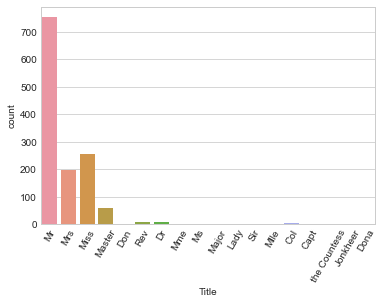

In [60]:
sns.countplot(x='Title', data=train_df)
plt.xticks(rotation=60) #Güzel görünmesi açısından yazılara rotasyon belirttik.
plt.show()

In [61]:
train_df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

Çıktıyı yorumlayalım. 700'den fazla Mr, 200 tane Mrs, yaklaşık 250 tane Miss, yaklaşık 50 tane Master değerlerinin bulunduğunu görüyoruz. Toplamda 17 tane title vardır. Bu title'leri gruplayabiliriz. Don 'dan itibaren nadir bulunan title'ler bulunmakta. Bu nedenle bunları birleştirebiliriz. Şu şekilde birleştirebiliriz: Mesela Mr diye bir title yaparız, daha sonra Master diye bir title yaparız ve Miss, kadınların kullandığı title'leri birleştirip bir title yapabiliriz ve geri kalan diyede farklı bir title yapabiliriz. 4 tane kategoriden oluşan bir kategorik hal elde edebiliriz.

Şimdi kategorik hale getirme işlemi yapalım.

In [62]:
train_df["Title"] = train_df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other") 

Yukarıda görüldüğü üzere Don 'dan itibaren olan tüm title'leri others isimli tek bir kategoride topladım.

Şimdi Mr, Mrs, Mme, Miss, Mlle title'lerini birleştirerek tek bir title haline getirelim.

In [63]:
train_df["Title"] = [0 if i=="Master" else 1 if i =="Miss" or i=="Ms" or i=="Mlle" or i=="Mrs" else 2 if i =="Mr" else 3 for i in train_df["Title"]]

Yukarıda, title'leri sayısal değerleri çevirdim ve Mrs, Miss, Mme, Ms, Mlle'yi  birleştirdim.

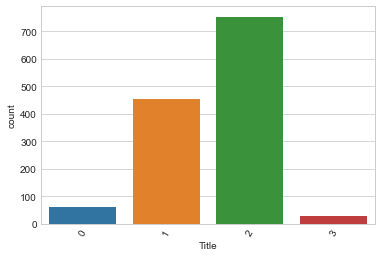

In [64]:
sns.countplot(x='Title', data=train_df)
plt.xticks(rotation=60) #Güzel görünmesi açısından yazılara rotasyon belirttik.
plt.show()

Yukarıda görüldüğü üzere 0,1,2,3 olmak üzere 4 tane kategori elde ettik.

In [65]:
train_df["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

Oluşturduğumuz kategorilere göre hayatta kalma oranlarına bakalım.

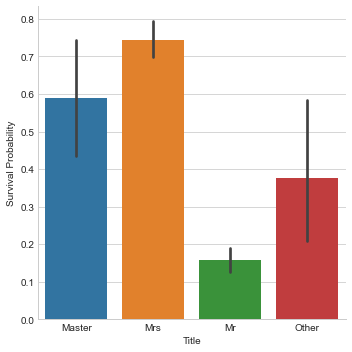

In [66]:
g = sns.factorplot(x="Title", y="Survived", data=train_df, kind="bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

Hayatta kalma oranı en yüksek olan kadınlardır (Mrs) ve en düşük olan erkeklerdir (Mr).

Name feature'sini kullanarak 4 tane kategori oluşturduk. Ve kategorileri içeren Title isimli bir feature oluşturduk. Bu nedenle train_df içerisinden Name feature'sini kaldırabiliriz. Çünkü Name feature'sine machine learning algoritmasını eğitmek için gerek kalmamıştır.

In [67]:
train_df.drop(labels = ["Name"], axis = 1, inplace = True)

In [68]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,2


Görüldüğü üzere artık Name feature'si yoktur ve Title isimli bir feature eklenmiştir.

Title'yi 0,1,2,3 yapmaktansa 4 tane Title feature'si elde edip bunları kategorik hale getirelim.

In [69]:
train_df = pd.get_dummies(train_df, columns=["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


Görüldüğü üzere Title feature'si kalktı ve yerine Title_0, Title_1,	Title_2, Title_3 isimlerinde 4 tane feature geldi. Böylece Title feature'si dörde bölünmüştür.

## Feature Engineering: Family Size

Yeni bir feature oluşturalım.

In [70]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


SibSp feature'sinde kişinin eş veya kardeş sayısı bilgisi bulunur. Parch feature'sinde çocuk veya aile sayısı bilgisi bulunur. Bu 2 feature'yi birleştirerek Family Size isimli bir feature oluşturalım.

In [71]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

1 eklenme sebebi, Parch değeri 0 ve SibSp değeri 0 ise 0+0=0 dır ve kişinin ailesi 0 kişiden oluşuyor demek mantıklı değildir. Sonuç olarak bireylerde 1 kişilik ailedir. Dolayısıyla en kötü ihtimalle yolcunun ailesi yok ise yolcunun kendisi olacağı için 1 ekliyoruz ve oluşturacağımız feature'ye 0 değil 1 yazılmasını sağlıyoruz.

In [72]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


Şimdi hayatta kalma oranı ile Fsize feature arasında ilişki olup olmadığına bakalım.

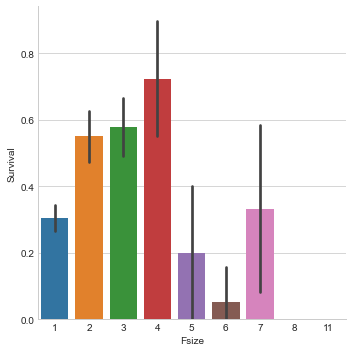

In [73]:
g = sns.factorplot(x = "Fsize", y = "Survived", data=train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

Fsize=5 olana kadar, Fsize değeri arttıkça hayatta kalma oranıda artmaktadır. Fsize=5 olduğunda hayatta kalma oranı hızlı bir şekilde düşüyor. 

threshold=5 seçelim ve iki tane kategori oluşturalım. Fsize değeri 5 'ten küçük olanlar bir kategori, büyük olanlar bir kategori olacaktır.

In [74]:
train_df["family_size"] = [1 if i < 5 else 0 for i in train_df["Fsize"]]

In [75]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,1
5,6,0.0,3,1,25.0,0,0,330877,8.4583,NaN,Q,0,0,1,0,1,1
6,7,0.0,1,1,54.0,0,0,17463,51.8625,E46,S,0,0,1,0,1,1
7,8,0.0,3,1,2.0,3,1,349909,21.0750,NaN,S,1,0,0,0,5,0
8,9,1.0,3,0,27.0,0,2,347742,11.1333,NaN,S,0,1,0,0,3,1
9,10,1.0,2,0,14.0,1,0,237736,30.0708,NaN,C,0,1,0,0,2,1


family_size feature'sinde kaç tane 0 ve kaç tane 1 olduğuna count plot ile bakalım.

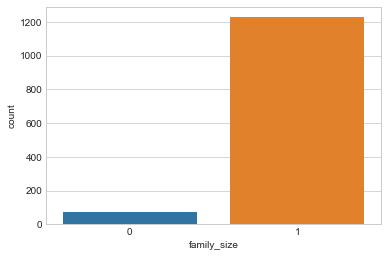

In [76]:
sns.countplot(x = "family_size", data = train_df)
plt.show()

Çıktıyı yorumlayalım. Yaklaşık 100 tane 0 var ve yaklaşık 1200 tane 1 vardır.

Şimdi bunların hayatta kalma oranı ile ilişkilerine bakalım.

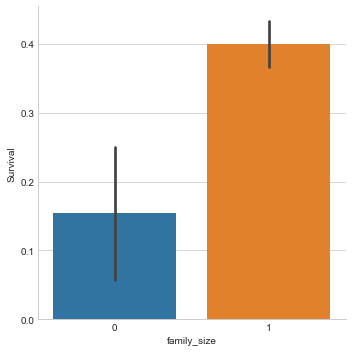

In [77]:
g = sns.factorplot(x = "family_size", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

family_size=0 değerleri yaklaşık 0.15'lik bir hayatta kalma oranına sahip ve family_size=1 değerleri yaklaşık 0.4'lik bir hayatta kalma oranına sahiptir.

Sonuç olarak, ailesinin içerisinde çok fazla bireye sahip kişilerin hayatta kalma oranları daha küçüktür. Ama küçük ailelerde hayatta kalma oranı büyük ailelere göre daha yüksektir yorumunu yapabiliriz.

Şimdi family_size feature'sindeki 0 ve 1 değerlerini iki tane feature'ye dökelim.

In [78]:
train_df = pd.get_dummies(train_df, columns= ["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,0,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,0,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,0,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,1


Çıktıda gördülüğü üzere family_size feature'si ortadan kalktı, family_size_0 ve family_size_1 isimlerinde iki tane feature oluştu.

## Feature Engineering: Embarked

Embarked feature'sinde yolcuların hangi limandan bindiğine dair bilgiler bulunmaktadır.

In [79]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

Embarked feature'sinde S,C,Q değerleri bulunmaktadır. Şimdi bu değerlerden kaçar tane bulunduğuna bakalım.

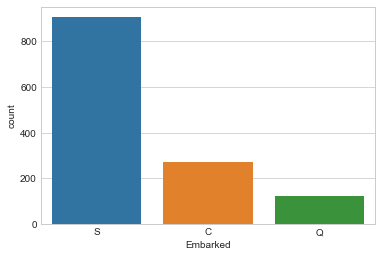

In [80]:
sns.countplot(x = "Embarked", data = train_df)
plt.show()

S limanından gemiye binen yolcu sayısı 800'den fazladır. C limanından gemiye binen yolcu sayısı yaklaşık 250 kişidir. Q limanından gemiye binen yolcu sayısı yaklaşık 150 kişidir. 

Şimdi Embarked feature'sini ortadan kaldıralım ve S,Q,C değerlerinin her birisi için yeni feature'ler oluşturalım. Yani Embarked feature'sini üçe bölelim.

In [81]:
train_df = pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


Çıktıda gördüldüğü üzere Embarked feature'si kaldırıldı ve 	Embarked_C,	Embarked_Q,	Embarked_S isimlerinde 3 tane feature elde edildi.

## Feature Engineering: Ticket

In [82]:
train_df["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

Çıktıdaki ifadeleri boşluk sembolünden ayırdığımızda bazılarında sol tarafta ifadeler var bazılarında yok. Şimdi baştaki yazıları, sondaki yazılardan yani boşluk sembolünden ayıracağız ve 0.indeks konumunda hiçbir şey yok ise, hiçbir şey yok anlamında X sembolünü vereceğiz. 

In [83]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets

In [84]:
train_df["Ticket"].head(20)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object

Çıktıda görüldüğü üzere, sondaki sayıları kaldırarak, baştaki ifadelerin olmasını sağladık ve sayıdan önce ifade olmayan satırlara X ekledik.

In [85]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,1,0,A5,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1.0,1,0,38.0,1,0,PC,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1.0,3,0,26.0,0,0,STONO2,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1.0,1,0,35.0,1,0,x,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0.0,3,1,35.0,0,0,x,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


Şimdi Ticket feature'sini kaldıralım he Ticket feature'si içerisindeki her bir kategori için yeni bir feature oluşturalım.

In [86]:
train_df = pd.get_dummies(train_df, columns= ["Ticket"], prefix = "T")
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,1,22.0,1,0,7.2500,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1,0,38.0,1,0,71.2833,C85,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,3,0,26.0,0,0,7.9250,NaN,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1.0,1,0,35.0,1,0,53.1000,C123,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0.0,3,1,35.0,0,0,8.0500,NaN,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0.0,3,1,25.0,0,0,8.4583,NaN,0,...,0,0,0,0,0,0,0,0,0,1
6,7,0.0,1,1,54.0,0,0,51.8625,E46,0,...,0,0,0,0,0,0,0,0,0,1
7,8,0.0,3,1,2.0,3,1,21.0750,NaN,1,...,0,0,0,0,0,0,0,0,0,1
8,9,1.0,3,0,27.0,0,2,11.1333,NaN,0,...,0,0,0,0,0,0,0,0,0,1
9,10,1.0,2,0,14.0,1,0,30.0708,NaN,0,...,0,0,0,0,0,0,0,0,0,1


prefix = "T" parametresi ile kategori isminin önüne Ticket değil de T yazılması sağlanmıştır. Eğer bu parametre kullanılmasaydı feature isimleri Ticket_kategoriAdi şeklinde olurdu.

## Feature Engineering: Pclass

Pclass içerisindeki kategoirlerin dağılımına bakalım.

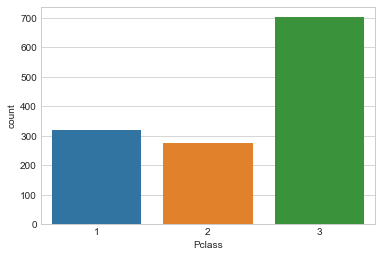

In [87]:
sns.countplot(x = "Pclass", data = train_df)
plt.show()

Çıktıyı yorumlayalım. 1.sınıftaki yolcuların sayısı yaklaşık 300, 2.sınıftaki yolcuların sayısı yaklaşık 300, 3.sınıftaki yolcuların sayısı 700 'dür.

Şimdi Pclass feature'si içerisindeki her bir kategoriye ait feature'ler oluşturalım ve Pclass feature'sini ortadan kaldıralım.

In [88]:
train_df["Pclass"] = train_df["Pclass"].astype("category") #Öncelikle categorical'e çevirdim.
train_df = pd.get_dummies(train_df, columns= ["Pclass"])
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,1,22.0,1,0,7.2500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,0,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,0,26.0,0,0,7.9250,NaN,0,1,...,0,1,0,0,0,0,0,0,0,1
3,4,1.0,0,35.0,1,0,53.1000,C123,0,1,...,0,0,0,0,0,0,1,1,0,0
4,5,0.0,1,35.0,0,0,8.0500,NaN,0,0,...,0,0,0,0,0,0,1,0,0,1


Çıktıda görüldüğü üzere Pclass feature'si kaldırıldı ve Pclass_1, Pclass_2, Pclass_3 olmak üzere 3 tane feature oluşturuldu.

## Feature Engineering: Sex

In [89]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,1,0.0,22.0,1,0,7.2500,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1.0,38.0,1,0,71.2833,C85,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1.0,26.0,0,0,7.9250,NaN,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,4,1.0,35.0,1,0,53.1000,C123,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,5,0.0,35.0,0,0,8.0500,NaN,0,0,1,...,0,0,0,0,1,0,0,1,0,1


Çıktıda görüldüğü üzere Sex_0 kadınları, Sex_1 erkekleri ifade edecek şekilde iki tane feature oluşturuldu.

## Feature Engineering: Drop Passenger ID and Cabin

Maching learning modelini eğitmek için kullacağımız feature'ler arasında kullanmak istemediğimiz şeyleri drop edelim.

In [90]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)

"PassengerId" ve "Cabin" sütunları drop edilmiştir.

In [91]:
train_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'Fsize', 'family_size_0', 'family_size_1',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A', 'T_A4', 'T_A5',
       'T_AQ3', 'T_AQ4', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC',
       'T_Fa', 'T_LINE', 'T_LP', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA3',
       'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC',
       'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_STONOQ', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1'],
      dtype='object')

## Modeling: Train Test Split

Maching learning modelini eğitelim.

In [92]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [93]:
train_df_len

881

Yukarıdaki kod ile train_df'nin boyut bilgisine eriştik. Bu bilgiyi train ve test şeklinde ayırırken, indeksleri ayırabilmek için kullanacağız.

In [94]:
test = train_df[train_df_len:]
test.drop(labels = ["Survived"],axis = 1, inplace = True)

test = train_df[train_df_len:]

Bu satırda, train_df_len'den başlayarak sona kadar olan kısım test değişkenine atanmıştır.

test.drop(labels = ["Survived"],axis = 1, inplace = True)

Bu satırda, test seti içerisinden Survived feature'si çıkarılmıştır.

In [95]:
test.head()

,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
881,34.5,0,0,7.8292,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
882,47.0,1,0,7.0000,0,1,0,0,2,0,...,0,0,0,0,1,0,0,1,1,0
883,62.0,0,0,9.6875,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
884,27.0,0,0,8.6625,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
885,22.0,1,1,12.2875,0,1,0,0,3,0,...,0,0,0,0,1,0,0,1,1,0


In [96]:
train = train_df[:train_df_len]
X_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 590
X_test 291
y_train 590
y_test 291
test 418


train = train_df[:train_df_len]

Bu satırda, baştan train_df_len değerine kadar olan kısım train değişkenine atanır.

Çıktıyı inceleyelim. X_train verisinin 590 tanesini train etmek için ve 291 tanesini test etmek için kullanacağız. Ve 418 tane ayrıyeten test seti vardır. Bu başlangıçta train ve validation setlerinden ayrılan test setidir. Train ve validation setleri ile model eğitilip, uygun parametreler ayarlanır ve model hazır olduktan sonra en son bu test seti ile test etme işlemi yapılır.

## Modeling: Simple Logistic Regression Model

In [97]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 82.71
Testing Accuracy: % 81.79


y_train'de survived değerleri bulunmaktadır ve x-train'de diğer feature'ler bulunmaktadır.

Yukarıdaki kod bloğu ile Logistic Regression modeli oluşturulmuştur.

## Modeling: Hyperparameter Tuning -- Grid Search -- Cross Validation

Decision Tree, SVM, Random Forest, KNN, Logistic Regression algoritmaları sonucunda elde edilen modelleri karşılaştıracağız. Ayrıca Hyperparameter Tuning yapacağız. Hyperparameter Tuning, modellerin içerisinde bulunan parametreler için en iyisini bulacağız. Bu işlemi yaparken Grid Search yöntemini kullanacağız. Bulduğumuz parametrelerin en iyi değerlerini karşılaştırıkende Cross Validation yöntemini kullanacağız.

In [98]:
random_state = 42 
#Bir başka cihazda bu kodları çalıştırdığımızda aynı sonucu elde etmek istiyorsak, her iki cihazda da random_state değerini
#aynı yaparız.

classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]  #KNN'de randomluk yoktur.

#Hyperparameter Tuning yapabilmemiz için gerekli olan parametreleri seçelim:
#Aşağıdaki kırmızı ifadeler parametreleri, yeşil ifadeler bu parametrelerin alabileceği değerleri ifade ederler.

#decision tree için:
dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

#SVM için:
svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

#Random forest için:
rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

#Logistic Regression için:
logreg_param_grid = {"C":np.logspace(-3,3,7), #-3'den 3'e kadar 7 tane sayı elde edildi.
                    "penalty": ["l1","l2"]}

#KNN için:
knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

Hyperparameter Tuning, model içerisinde kullandığımız seçilmesi gereken parametrelerdir. Yukarıda kırmızı ifadeler ilgili algoritma için gerekli parametrelerdir. Ve karşılarındaki yeşil ifadeler ilgili parametreye verilebilecek değerlerdir ve amaç o yeşil değerlerden hangisinin ilgili parametre için en uygun olacağını tespit etmektir. Bir algoritma için parametrelerin kombinasyonları yapılır. Her bir kombinasyon ile algoritma çalıştırılır ve bir çok accuracy değeri elde edilir. En yüksek accuracy değeri parametrelerin hangi değerleri için elde edildiyse, o değerler parametreler için en uygun olanlardır. Hyperparameter Tuning budur. Bu işlemler şu şekildedir:

<br><br>
<img src="t1.png" style="width:500px;height:200px"/>

Yukarıdaki görselde görüldüğü üzere KNN algoritmasının n_neighbors ve metric parametreleri için kombinasyonlar yapılmıştır ve algoritma her bir kombinasyon için çalıştırılmıştır. Bir çok accuracy değeri elde edilmiştir ve en yüksek accuracy değerinin n=3 ve m=euclidean değerleri için elde edildiği varsayılmıştır.

Grid Search'de her bir grip parametrelerin bir kombinasyonunu ifade etmektedir. Sonrasında her bir kombinasyon için bir accuracy değeri elde ediliyor. Bu işlemi Grid Search yöntemi kendisi yapıyor. 

Grid Searc'ü görsel üzerinden görelim:

<br><br>
<img src="t2.png" style="width:500px;height:200px"/>

In [99]:
cv_result = []  #sonuçları tutacak.
best_estimators = [] #maching learning modelleri içerisindeki en iyileri tutacak.
for i in range(len(classifier)): 
# Bir üst kod bloğunda belirttiğimiz paramatreler için en iyi maching learning modelini seçmek için for döngüsü kullanılmıştır.
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    #n_jobs = -1 parametresi ile paralel çalışması sağlanır ve böylece hız kazanılır.
    #verbose = 1 parametresi ile kod çalışırken sonuçların sürekli gösterilmesi sağlanmıştır.
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8355932203389831
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.7983050847457627
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.840677966101695
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.8220338983050846
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7779661016949152


Şimdi yukarıdaki çıktıyı görselleştirelim.

Text(0.5, 1.0, 'Cross Validation Scores')

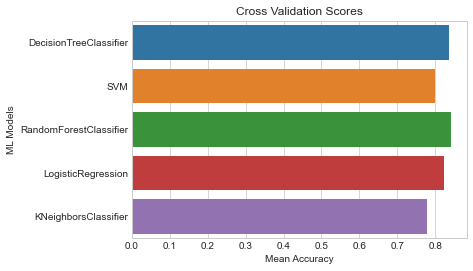

In [100]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

Yukarıdaki çıktıda modellerin başarı değerlerine dair bir görsel görmekteyiz.

## Modeling: Ensemble Modeling

<br><br>
<img src="t3.png" style="width:700px;height:400px"/>


Yukarıdaki görsel üzerinden voting classifier'ı açıklayayım. Amaç bir insanın hayatta kalıp kalmama durumunu tespit etmektir. Voting'in soft ve hard olmak üzere birisini kullanabileceğimiz 2 tane parametresi vardır. 

Öncelikle Hard parametresini kullanırsak nasıl çalışacağını anlatayım:

Kullanılmasını istediğimiz algoritmaları classifier kısmında görmektesiniz. Her bir algoritmaya göre Alex kişisinin hayatta kalıp kalmadığı tahmini yapılır. Random forest'a göre 0 (hayatta değil), decision tree'ye göre 0, logistic regression'a göre 1 (hayattadır) tahminleri yapılmıştır. Sonrasında voting classifier hard parametresi ile çalıştığından şunu yapar: Tahminlerde kaç tane 0 ve kaç tane 1 olduğuna bakar. En çok adet hangi değer için ise voting classifier sonucu o değer olur.

Soft parametresini kullanırsak nasıl çalışacağını anlatayım:

Görselde yeşil kısımda gördüğünüz durumdur. Her bir algoritma için şu işlem yapılır: o algoritmaya göre 0 çıkma olasılığı yazılır ve 1 çıkma olasılığı yazılır. Sonra tüm algoritmalardan elde edilen 0 çıkma olasılıkları toplanır ve toplam sonucu 3'e bölünür. Aynı şekilde 1 çıkma olasılıkları toplanır ve toplam sonucu 3'e bölünür. Elde edilen hangi değer büyük ise o olasılık değerinin ait olduğu 0 ya da 1 değeri voting classifier sonucudur.

Şimdi bu anlatılanları uygulayarak maching learning modellerini birleştirerek daha iyi tahminler yapalım.

In [101]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),  #kullanmak istediğimiz modelleri yazdık.
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test),y_test))

0.8178694158075601


best_estimators[0] ifadesi, 

classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()] 
             
kısmındaki 0.indeks olan Decision Tree'dir.

Çıktıda görüldüğü üzere 0.81 değerinde accuracy elde edilmiştir.

## Modeling: Prediction and Submission

In [102]:
test_survived = pd.Series(votingC.predict(test), name = "Survived").astype(int)
results = pd.concat([test_PassengerId, test_survived],axis = 1)
results.to_csv("titanic.csv", index = False)

test_survived = pd.Series(votingC.predict(test), name = "Survived").astype(int)

Bu satırda: Survived isimli bir seri oluşturuyorum. test verisini kullanarak yapılan sonuçları 0 ve 1'leri içerisinde depoluyor.

results = pd.concat([test_PassengerId, test_survived],axis = 1)

Bu satırda, test_PassengerId ve test_survived birleştiriliyor.

results.to_csv("titanic.csv", index = False)

Bu satırda, csv formatında dışarı aktarılmıştır.